In [1]:
import numpy as np
import pandas as pd
import json
import ast
from tqdm import tqdm
import pandas as pd
import numpy as np
import nltk
nltk.download('reuters')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import reuters
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import sklearn
import re
from wordcloud import WordCloud
from matplotlib import pyplot as plt


[nltk_data] Downloading package reuters to
[nltk_data]     /home/sarthakj01/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [124]:
# Solana  ,   Avalanche  ,  DogeCoin  ,  Matic  ,  Ripple  ,  ShibaInu

In [29]:
crypto = "Avalanche"

In [30]:
df = pd.read_csv(f'./preprocessed_data/{crypto}_combined_preproc.csv')

In [31]:
print(df.shape)

(44327, 24)


In [32]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'text', 'favourite_count',
       'retweet_count', 'created_at', 'User', 'place', 'time', 'high', 'low',
       'open', 'volume_from', 'volume_to', 'close', 'user_id_str', 'user_name',
       'user_followers_count', 'user_verified', 'hashtags', 'mentioned',
       'clean_tweet', 'changed_text'],
      dtype='object')

In [33]:
string = []
for t in df['changed_text']:
    string.append(t)
token_set = set()
for sent in string:
    # print(sent)
    sent = str(sent)
    # print(type(sent))
    toks = list(sent.split(' '))
    for tok in toks:
        token_set.add(tok)
token_set = list(token_set)
string = list(set(string))
string = pd.Series(token_set).str.cat(sep=' ')

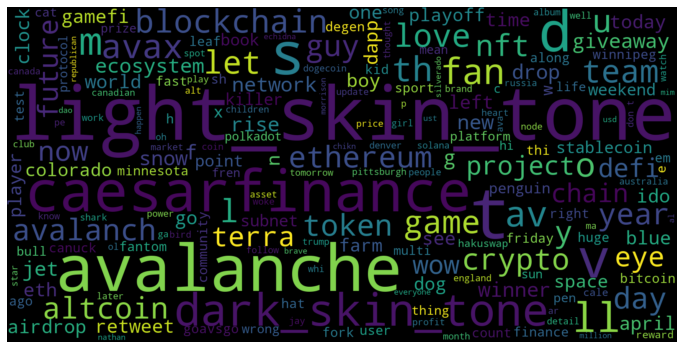

In [34]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(f'./eda_results/wordcloud_{crypto}')
plt.show()

In [131]:
print(df.shape)
df.shape[0]

(44327, 24)


44327

Tweet Counts

In [132]:
coins = ['avax', 'doge', 'matic', 'ripple', 'shiba', 'solana']

In [133]:
df_avax = pd.read_csv("./preprocessed_data/Avalanche_combined_preproc.csv")
df_doge = pd.read_csv("./preprocessed_data/DogeCoin_combined_preproc.csv")
df_matic = pd.read_csv("./preprocessed_data/Matic_combined_preproc.csv")
df_ripple = pd.read_csv("./preprocessed_data/Ripple_combined_preproc.csv")
df_shib = pd.read_csv("./preprocessed_data/ShibaInu_combined_preproc.csv")
df_sol = pd.read_csv("./preprocessed_data/Solana_combined_preproc.csv")

KeyboardInterrupt: 

In [ ]:
counts = {'avax': df_avax.shape[0], 'doge': df_doge.shape[0], 'matic': df_matic.shape[0], 'ripple': df_ripple.shape[0], 'shiba': df_shib.shape[0], 'solana': df_sol.shape[0]}

In [ ]:
counts_df = pd.DataFrame(counts.items(), columns=['crypto coin','#tweets'])
counts_df[counts_df.columns[::-1]]

,#tweets,crypto coin
0,44327,avax
1,54307,doge
2,263109,matic
3,4021,ripple
4,42857,shiba
5,182639,solana


In [ ]:
counts_df

,crypto coin,#tweets
0,avax,44327
1,doge,54307
2,matic,263109
3,ripple,4021
4,shiba,42857
5,solana,182639


In [ ]:
counts_df.loc[counts_df["crypto coin"] == "avax", "#tweets"] = 22229

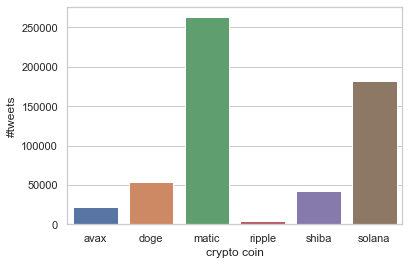

In [ ]:
sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.barplot(x="crypto coin", y="#tweets", data=counts_df)
plt.savefig("./eda_results/tweet_counts.png", bbox_inches='tight', facecolor='w')

In [ ]:
df_doge.iloc[0]

Unnamed: 0.1                                                            0
Unnamed: 0                                                           6982
id                                                  1509680000000000000.0
text                    The current value of 1 DOGE in USD is: $0.1378...
favourite_count                                                         4
retweet_count                                                           0
created_at                                            2022-04-01 00:00:02
User                    {'id': 2435986338, 'id_str': '2435986338', 'na...
place                                                                 NaN
time                                                  2022-04-01 00:01:00
high                                                               0.1382
low                                                                0.1378
open                                                               0.1382
volume_from                           